In [ ]:
# 

In [1]:
import re

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [23]:
from sklearn import decomposition
from sklearn import datasets

In [ ]:
np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

## F19FTSCCWLJ0172_RRBkdnM Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ab = pd.read_table('A_B-CFP.info.addpv',header=None,names=['GO term','Annotation','t1','t2','t3','t4','PV'])

In [3]:
ab.head()

,GO term,Annotation,t1,t2,t3,t4,PV
0,GO:0031234,extrinsic component of cytoplasmic side of pla...,3,49,94,16781,0.003290
1,GO:0019897,extrinsic component of plasma membrane,3,49,133,16781,0.008361
2,GO:0055037,recycling endosome,3,49,142,16781,0.009940
3,GO:0009898,cytoplasmic side of plasma membrane,3,49,156,16781,0.012716
4,GO:0055038,recycling endosome membrane,2,49,54,16781,0.012412


In [4]:
cd = pd.read_table('C_D-CFP.info.addpv',header=None,names=['GO term','Annotation','t1','t2','t3','t4','PV'])

In [5]:
cd.head()

,GO term,Annotation,t1,t2,t3,t4,PV
0,GO:0005887,integral component of plasma membrane,3,5,1508,16781,0.022947
1,GO:0031226,intrinsic component of plasma membrane,3,5,1565,16781,0.025125
2,GO:0044459,plasma membrane part,3,5,2492,16781,0.073368
3,GO:0005886,plasma membrane,3,5,4856,16781,0.389998
4,GO:0071944,cell periphery,3,5,4958,16781,0.393847


In [7]:
abcd_merge = ab.merge(cd,how='outer',on='GO term')

In [9]:
abcd_merge.head()

,GO term,Annotation_x,t1_x,t2_x,t3_x,t4_x,PV_x,Annotation_y,t1_y,t2_y,t3_y,t4_y,PV_y
0,GO:0031234,extrinsic component of cytoplasmic side of pla...,3.0,49.0,94.0,16781.0,0.003290,NaN,NaN,NaN,NaN,NaN,NaN
1,GO:0019897,extrinsic component of plasma membrane,3.0,49.0,133.0,16781.0,0.008361,NaN,NaN,NaN,NaN,NaN,NaN
2,GO:0055037,recycling endosome,3.0,49.0,142.0,16781.0,0.009940,NaN,NaN,NaN,NaN,NaN,NaN
3,GO:0009898,cytoplasmic side of plasma membrane,3.0,49.0,156.0,16781.0,0.012716,NaN,NaN,NaN,NaN,NaN,NaN
4,GO:0055038,recycling endosome membrane,2.0,49.0,54.0,16781.0,0.012412,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
abcd_merge_t1 = abcd_merge.query('(PV_x<=0.05) | (PV_y <=0.05)')[['GO term','Annotation_x','Annotation_y','PV_x','PV_y']]

In [14]:
abcd_merge_t1.head()

,GO term,Annotation_x,Annotation_y,PV_x,PV_y
0,GO:0031234,extrinsic component of cytoplasmic side of pla...,NaN,0.003290,NaN
1,GO:0019897,extrinsic component of plasma membrane,NaN,0.008361,NaN
2,GO:0055037,recycling endosome,NaN,0.009940,NaN
3,GO:0009898,cytoplasmic side of plasma membrane,NaN,0.012716,NaN
4,GO:0055038,recycling endosome membrane,NaN,0.012412,NaN


In [20]:
abcd_merge_t1.PV_y.fillna(value=1,inplace=True)

In [22]:
abcd_merge_t1.PV_x.fillna(value=1,inplace=True)

In [23]:
abcd_merge_t1.head()

,GO term,Annotation_x,Annotation_y,PV_x,PV_y
0,GO:0031234,extrinsic component of cytoplasmic side of pla...,NaN,0.003290,1.0
1,GO:0019897,extrinsic component of plasma membrane,NaN,0.008361,1.0
2,GO:0055037,recycling endosome,NaN,0.009940,1.0
3,GO:0009898,cytoplasmic side of plasma membrane,NaN,0.012716,1.0
4,GO:0055038,recycling endosome membrane,NaN,0.012412,1.0


In [ ]:
=df[df['features_1'].isnull()][‘name’] 

In [37]:
abcd_merge_t1.loc[abcd_merge_t1['Annotation_x'].isnull(),'Annotation_x'] = abcd_merge_t1.loc[abcd_merge_t1['Annotation_x'].isnull(),'Annotation_y'].values[0]

In [40]:
abcd_merge_t1.head()

,GO term,Annotation_x,Annotation_y,PV_x,PV_y
0,GO:0031234,extrinsic component of cytoplasmic side of pla...,NaN,0.003290,1.0
1,GO:0019897,extrinsic component of plasma membrane,NaN,0.008361,1.0
2,GO:0055037,recycling endosome,NaN,0.009940,1.0
3,GO:0009898,cytoplasmic side of plasma membrane,NaN,0.012716,1.0
4,GO:0055038,recycling endosome membrane,NaN,0.012412,1.0


In [49]:
new_abc = pd.DataFrame()

In [51]:
new_abc['A_B_all'] = -np.log10(abcd_merge_t1.PV_x.values)

In [52]:
new_abc['C_D_all'] = -np.log10(abcd_merge_t1.PV_y.values)

In [53]:
new_abc.index = abcd_merge_t1.Annotation_x.values

In [54]:
new_abc

,A_B_all,C_D_all
extrinsic component of cytoplasmic side of plasma membrane,2.482831,-0.000000
extrinsic component of plasma membrane,2.077722,-0.000000
recycling endosome,2.002609,-0.000000
cytoplasmic side of plasma membrane,1.895651,-0.000000
recycling endosome membrane,1.906144,-0.000000
cytoplasmic side of membrane,1.792358,-0.000000
cell-cell contact zone,1.809121,-0.000000
sperm flagellum,1.625158,-0.000000
9+2 motile cilium,1.625158,-0.000000
peptidase complex,1.575891,-0.000000


In [63]:
import seaborn as sns

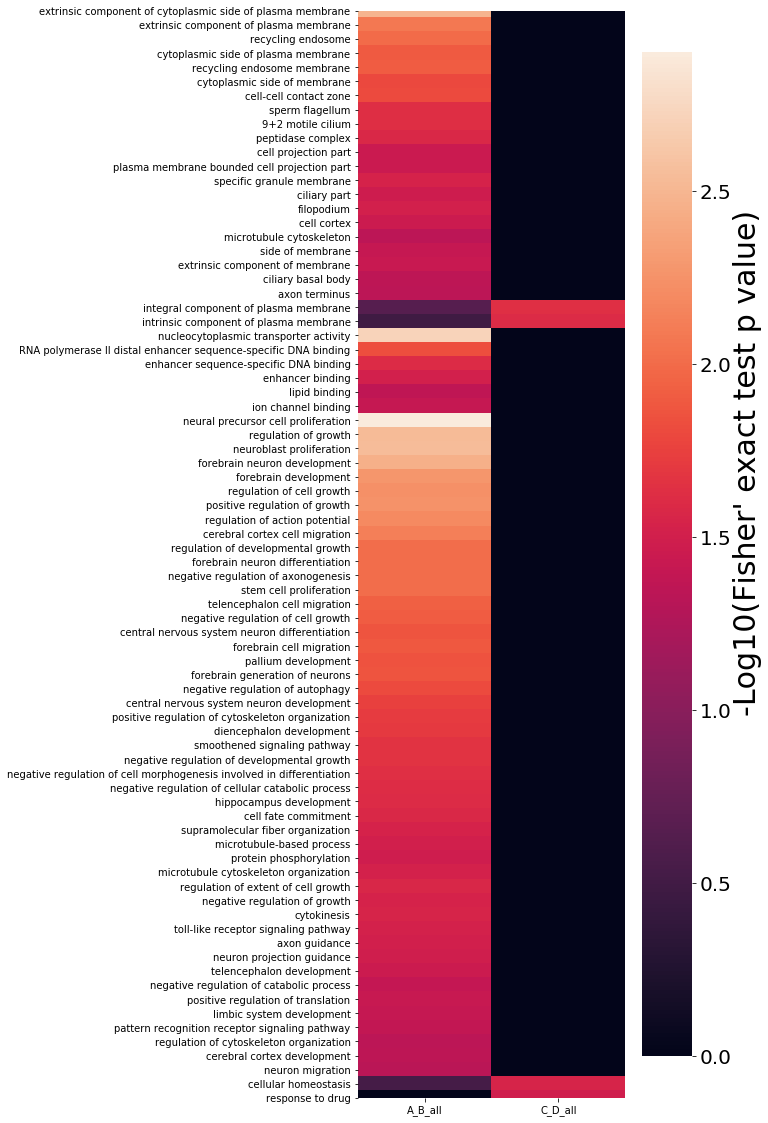

In [104]:
f, ax = plt.subplots(figsize=(6, 20))
sns.heatmap(new_abc, ax=ax)
ax.text(2.8,50,"-Log10(Fisher' exact test p value)",fontsize=30,rotation=90)
cbar = ax.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=20)
plt.savefig('ABCD-gene_GO_PV_heatmap.pdf',dpi=300,bbox_inches='tight')
plt.show()

In [89]:
ax.text?

In [105]:
from sklearn.datasets import load_boston

In [106]:
boston = load_boston()

In [110]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [126]:
genomesize = 335432867

33543

In [138]:
genomesize = 405432867
winsize = int(round(genomesize / 10**9,1) * 100000)

In [129]:
round(genomesize / 10**9,2)

0.34

In [139]:
a = 'hello.aaa.vv.txt'
a.split('.')[-1]

'txt'

In [1]:
import numpy as np

In [12]:
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

In [7]:
x

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329 ,  0.36163603, -0.64

e:\tf\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  


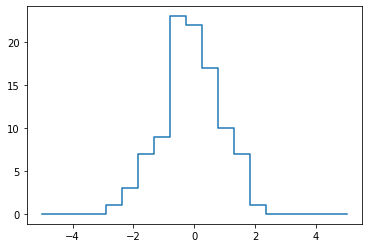

In [14]:
# plot the results
plt.plot(bins, counts, linestyle='steps')
plt.show()

In [40]:
np.random.seed(1)
x = np.random.randint(1,10,10)
bins = np.array([1,3,6,10])
counts = np.zeros_like(bins)

In [41]:
i = np.searchsorted(bins, x, side='right')

# add 1 to each of these bins
np.add.at(counts, i, 1)


In [42]:
x

array([6, 9, 6, 1, 1, 2, 8, 7, 3, 5])

In [43]:
counts

array([0, 3, 2, 5])

In [29]:
len(x[(x<=6) & (x>3)])

28

In [36]:
np.searchsorted?

In [45]:
aaa = np.arange(1,10,2)

In [54]:
aaa = bins
bbb = counts[1:]

In [55]:
aaa

array([ 1,  3,  6, 10])

In [56]:
bbb

array([3, 2, 5])

In [57]:
for i in range(len(bbb)):
    print('{}\t{}\t{}'.format(aaa[i],aaa[i+1],bbb[i]))

1	3	3
3	6	2
6	10	5


In [59]:
np.log2(4)

2.0

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [36]:
def RGB_to_Hex(rgb):
    RGB = rgb.split(',')            # 将RGB格式划分开来
    color = '#'
    for i in RGB:
        num = int(i)
        # 将R、G、B分别转化为16进制拼接转换并大写  hex() 函数用于将10进制整数转换成16进制，以字符串形式表示
        color += str(hex(num))[-2:].replace('x', '0').upper()
    return color

In [39]:
RGB_X_cor = ['158,1,66',
'213,62,79',
'244,109,67',
'253,174,97',
'254,224,139',
'230,245,152',
'171,221,164',
'102,194,165',
'50,136,189',
'94,79,162']

In [40]:
HEX_X_cor = [RGB_to_Hex(i) for i in RGB_X_cor]

#9E0142
#D53E4F
#F46D43
#FDAE61
#FEE08B
#E6F598
#ABDDA4
#66C2A5
#3288BD
#5E4FA2


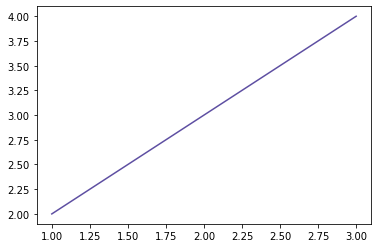

In [58]:
fig , ax = plt.subplots()

ax.plot([1,3],[2,4],color='#5E4FA2')

plt.show()

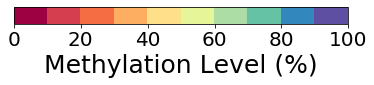

In [55]:
# create dummy invisible image
# (use the colormap you want to have on the colorbar)
cmap = mpl.colors.ListedColormap(HEX_X_cor)
img = plt.imshow(np.array([[0,100]]), cmap=cmap)
pl.gca().set_visible(False)
cb= plt.colorbar(orientation="horizontal")
#horizontal vertical
cb.set_label('Methylation Level (%)',fontsize=25)
cb.ax.tick_params(labelsize=20)
#
plt.savefig('Circos_legends.png',dpi=300,bbox_inches='tight')
#
plt.show()

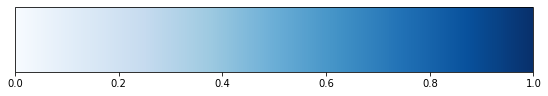

In [21]:
import pylab as pl
import numpy as np

a = np.array([[0,1]])
pl.figure(figsize=(9, 1.5))
img = pl.imshow(a, cmap="Blues")
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.2, 0.8, 0.6])
pl.colorbar(orientation="horizontal", cax=cax)

plt.show()

In [ ]:
a = {'A':'hhh','B':}

In [3]:
b = [1,2,["A","B"]]
c,d,e = b

In [4]:
print(c,d,e)

1 2 ['A', 'B']


In [5]:
PT = "ProjectType"
conf_dic = {'ProjectType':"RRBS"}
db_dic = {'MethyAndCout':{'Bismark':'xxxxx'},'Alignment':{'Bismark':'xxxx'}}
if conf_dic[PT] != "WGBS":
    (db_dic["MethyAndCout"]["Target"] == None or db_dic["Alignment"]["Target"] == None or "Target" not in db_dic["MethyAndCout"].keys() or "Target" not in db_dic["Alignment"].keys()):
    print('ok')
else:
    print('eee')

KeyError: 'Target'

In [7]:
db_dic["MethyAndCout"]["Target"]

KeyError: 'Target'

In [8]:
import yaml

In [11]:
Raw_QC = {'QC_Q20':85,'QC_Adapter':95}
a = yaml.dump(Raw_QC)

In [13]:
a

'QC_Adapter: 95\nQC_Q20: 85\n'

In [14]:
print(a)

QC_Adapter: 95
QC_Q20: 85



In [15]:
RawQC_shell_scr = "/home/chengjiawen1/software/Python3/bin/python3 {pipline_bin_abspath}/{flag}/get_shell.pl \
-config {flag_conf} \
-data_list {rawdata_list_abspath} \
-outdir {outdir_abspath}".format(pipline_bin_abspath=pipline_bin_abspath,
                                 flag=flag,flag_conf=flag_conf,
                                 rawdata_list_abspath=rawdata_list_abspath,
                                 outdir_abspath=outdir_abspath)
print(RawQC_shell_scr)

/home/chengjiawen1/software/Python3/bin/python3 A/B/get_shell.pl -config C -data_list D -outdir E


In [16]:
a = "/home/chengjiawen1/software/Python3/bin/python3"
def hello():
    print(a)
    print("Hello def")
def bb():
    print(a)
    print("bb def")
def main():
    hello()
    bb()
    print(a)
    print("END")

In [17]:
main()

/home/chengjiawen1/software/Python3/bin/python3
Hello def
/home/chengjiawen1/software/Python3/bin/python3
bb def
/home/chengjiawen1/software/Python3/bin/python3
END


In [18]:
a = ['a','b','c']
' '.join(a)

'a b c'

In [4]:
def test_args(arg1,arg2,arg3):
    print("arg1",arg1)
    print("arg2",arg2)    
    print("arg3",arg3)
args = ("One",2,3)
test_args(*args)

arg1 One
arg2 2
arg3 3


In [7]:
kwargs = {"arg1":10,"arg2":40,"arg3":"Hello"}
test_args(**kwargs)

arg1 10
arg2 40
arg3 Hello


In [8]:
def hello(*args):
    for i in args:
        print(f'Hello {i}')
names = ['CJW','Oocarain','Paprika']
hello(*names)

Hello CJW
Hello Oocarain
Hello Paprika


In [9]:
def fibon(n):
    a = b = 1
    for i in range(n):
        yield a
        a , b = b, a+b

In [14]:
def gene():
    for i in range(5):
        yield i

In [15]:
mg = gene()

In [16]:
print(next(mg))

0


In [17]:
print(next(mg))

1


In [22]:
mystr = "ChengJiaWen"
my_iter = iter(mystr)

In [23]:
for i in range(len(mystr)):
    print(next(my_iter))

C
h
e
n
g
J
i
a
W
e
n


In [25]:
def add(x):
    return (x+1)
def multiply(x):
    return (2*x+1)
funcs = [add,multiply]

In [26]:
for i in range(5):
    value = map(lambda x: x(i),funcs)
    print(list(value))

[1, 1]
[2, 3]
[3, 5]
[4, 7]
[5, 9]


In [27]:
print("hello"
     " oocarain")

hello oocarain


In [1]:
import re

In [13]:
s = 'abc'
m = re.match(r'>.*',s)
if m:
    print(m.group())
else:
    print(s)

abc


In [14]:
a = '>abc'
a[1:]

'abc'

In [2]:
import re

In [62]:
a = "ID=Pav_sc0000551.1_g020.1.ok;Note=PREDICTED: importin-11 isoform X2"

In [63]:
geneid = re.findall(r'ID=(Pav_sc\d{7}.\d_g\d{3}.\d.[mkbr]{2})',a)

In [67]:
if geneid:
    print('nk')
else:
    print('k')

k


In [41]:
b = [[1,100],[200,300],[350,380]]


In [39]:
def deal(alist,strand):
    s_cds = ''
    s_intron = ''
    s_cds_ls = []
    s_intron_ls = []
    for i in alist[1:-1]:
        s_cds_ls.append(str(i[0])+'-'+str(i[1]))
    if strand == '+':
        for i in range(1,len(alist)-1):
            s_intron_ls.append(str(alist[i][1]+1)+'-'+str(alist[i+1][0]-1))
    elif strand == '-':
        for i in range(0,len(alist)-2):
            s_intron_ls.append(str(alist[i][1]+1)+'-'+str(alist[i+1][0]-1))
    if strand == '-':
        s_cds_ls =  s_cds_ls[::-1]
        s_intron_ls = s_intron_ls[::-1]
    s_cds = ','.join(s_cds_ls)
    s_intron = ','.join(s_intron_ls)
    return [s_cds,s_intron]

In [68]:
detail = 'ID=CP_A000001;Source=MAKER1:DHR008627.1,MAKER2:DH008396.1;'
re.findall(r'ID=(CP_[AB]\d{6});',detail)

['CP_A000001']

In [71]:
detail = 'Parent=CP_A000001;'
cds_parent = re.findall(r'Parent=(CP_[AB]\d{6});',detail)
cds_parent

['CP_A000001']

In [2]:
range(5)[-1]

4

In [5]:
def hel(a,b=1,c=2):
    print(a)
    print(b+c)
hel('ok',b=2,c=5)

ok
7


In [22]:
b = 5
c = 'cheng'
for i in range(5):
    a = '''asdas
{} adas "HHH"
abc\tabc
{} ====
{{}}
'''.format(b,c)
    print(a)

asdas
5 adas "HHH"
abc	abc
cheng ====
{}

asdas
5 adas "HHH"
abc	abc
cheng ====
{}

asdas
5 adas "HHH"
abc	abc
cheng ====
{}

asdas
5 adas "HHH"
abc	abc
cheng ====
{}

asdas
5 adas "HHH"
abc	abc
cheng ====
{}



In [12]:
int('10CPU'.replace('CPU',''))

10

In [38]:
a = 'ooo'
print(f'{a} \' \' "#" \\t bbb ///')

ooo ' ' "#" \t bbb ///


In [42]:
a='a.b.c'
'.'.join(a.split('.')[:-1])

'a.b'

In [50]:
a = ['a','b','m']
a.append(1)

for i in range(len(a),step=3):
    print(a[i])

TypeError: range() takes no keyword arguments

In [52]:
import numpy as np

In [56]:
for i in np.arange(len(a),step=3):
    print(a[i])

a
1


In [59]:
[1,2,3,4,5][1:][::-1]

[5, 4, 3, 2]

In [60]:
import pandas as pd

In [65]:
a = pd.DataFrame({'A':['aa','bb','cc'],'B':[1,2,3,]})
b = pd.DataFrame({'A':['aa','aa','bb','cc','cc','dd'],'B':['Hello','KKK','LLL','OOO','PPP','ZZZ']})

In [62]:
a

,A,B
0,aa,1
1,bb,2
2,cc,3
3,dd,4


In [63]:
b

,A,B
0,aa,Hello
1,aa,KKK
2,bb,LLL
3,cc,OOO
4,cc,PPP
5,dd,ZZZ


In [68]:
pd.merge(a,b,how='inner',on='A')

,A,B_x,B_y
0,aa,1,Hello
1,aa,1,KKK
2,bb,2,LLL
3,cc,3,OOO
4,cc,3,PPP


In [72]:
Rscript = 'XXX'
str_r_scr_path = 'XXX'
str_out_DMR_file = 'XXX'
str_fmt_out_DMR_file = 'XXXX'
scr1_cont = f'{Rscript} {str_r_scr_path} && \\\n\
grep -v "#" {str_out_DMR_file} | sed \'s/;/\\t/g\' | cut -f 1,4,5,9,10,11,12,13,14,15,16,18,19 | perl -pe \'s/(\\t[^\\t]*?=)/\\t/g\' | sed \'s/gain/Hyper/\' | sed \'s/loss/Hypo/\' | \
awk \'{{print $1"_"$2"_"$3,$1,$2,$3,$4,$5,$6,$7,$8,$9,$10,$11,$12,$13}}\' OFS="\\t" > {str_fmt_out_DMR_file} && \\\n'
print(scr1_cont)

XXX XXX && \
grep -v "#" XXX | sed 's/;/\t/g' | cut -f 1,4,5,9,10,11,12,13,14,15,16,18,19 | perl -pe 's/(\t[^\t]*?=)/\t/g' | sed 's/gain/Hyper/' | sed 's/loss/Hypo/' | awk '{print $1"_"$2"_"$3,$1,$2,$3,$4,$5,$6,$7,$8,$9,$10,$11,$12,$13}' OFS="\t" > XXXX && \



In [73]:
a='a,a,ab'
a.split(',')

['a', 'a', 'ab']

In [74]:
a = ['Control','Treat',['C1','C2','C3'],['T1','T2','T3']]
a[2] + a[3]

['C1', 'C2', 'C3', 'T1', 'T2', 'T3']

In [86]:
a = {'a':'1','b':'2'}
b = {'a':'1','c':'2'}
d = {'a':'3','d':'5'}
c = [set(a.keys()),set(b.keys()),set(d.keys())]
c

[{'a', 'b'}, {'a', 'c'}, {'a', 'd'}]

In [87]:
def myintersect(aset,bset):
    return aset.intersection(bset)

In [91]:
from functools import reduce

In [92]:
list(reduce(myintersect,c))

['a']

In [94]:
c = [{},{}]
for i in range(2):
    if 'b' not in c[i].keys():
        c[i]['b'] = 'haha'
print(c)

[{'b': 'haha'}, {'b': 'haha'}]


In [101]:
a = {1:{},2:{}}
a

{1: {}, 2: {}}

In [ ]:
# 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Clean_Data_size.xls',sep='\t')
df.head()

,Sample ID,Fragment Length(bp),Sequencing Strategy,Clean Reads Number,Clean Data Size(bp),Clean Rate(%)
0,C_1,100~500bp,PE100,167108674,16710867400,94.98
1,C_2,100~500bp,PE100,165329290,16532929000,93.27
2,C_3,100~500bp,PE100,174133642,17413364200,94.27
3,CS_1,100~500bp,PE100,176477210,17647721000,94.36
4,CS_2,100~500bp,PE100,163540690,16354069000,94.54


In [7]:
df["Clean Reads Number"] = np.around(df["Clean Reads Number"].values / (10 ** 6), decimals=2)
df["Clean Data Size(bp)"] = np.around(df["Clean Data Size(bp)"].values / (10 ** 9), decimals=2)

In [8]:
df

,Sample ID,Fragment Length(bp),Sequencing Strategy,Clean Reads Number,Clean Data Size(bp),Clean Rate(%)
0,C_1,100~500bp,PE100,167.11,16.71,94.98
1,C_2,100~500bp,PE100,165.33,16.53,93.27
2,C_3,100~500bp,PE100,174.13,17.41,94.27
3,CS_1,100~500bp,PE100,176.48,17.65,94.36
4,CS_2,100~500bp,PE100,163.54,16.35,94.54
5,CS_3,100~500bp,PE100,183.62,18.36,95.31
6,J_1,100~500bp,PE100,150.84,15.08,92.94
7,J_2,100~500bp,PE100,171.94,17.19,94.21
8,J_3,100~500bp,PE100,172.76,17.28,93.61
9,JS_1,100~500bp,PE100,159.30,15.93,92.17


In [1]:
str_anno_DMR_dir='/A/B'
ctx='CG'
vsname='ooo_vs_xxx'
a=f'awk \'$15=="UP3K"{{print $16}}\' {str_anno_DMR_dir}/MutiDatailAnnoElement.All.{ctx}.{vsname}.gDMR.txt | sort | uniq | sed \'1i\\gene_id\' > gDMRInUP3KRelatedGenes.{ctx}.{vsname}.txt'
print(a)

awk '$15=="UP3K"{print $16}' /A/B/MutiDatailAnnoElement.All.CG.ooo_vs_xxx.gDMR.txt | sort | uniq | sed '1i\gene_id' > gDMRInUP3KRelatedGenes.CG.ooo_vs_xxx.txt


In [2]:
print('hello')

hello


In [1]:
import json

In [8]:
a = {'chr1:1301-1500':{'11121(AbTxC)':{'XMtxxc.1':'3UTR','XMtxxc.1':'exon3','XMtxxc.2':'intron2'},'TE0012':'chr1:1000-2000','CGI1231':'chr1:1400-1500'},
    }

In [9]:
print(a)

{'chr1:1301-1500': {'11121(AbTxC)': {'XMtxxc.1': 'exon3', 'XMtxxc.2': 'intron2'}, 'TE0012': 'chr1:1000-2000', 'CGI1231': 'chr1:1400-1500'}}


In [14]:
print(json.dumps(a,sort_keys=True, indent=4, separators=(',',':')))

{
    "chr1:1301-1500":{
        "11121(AbTxC)":{
            "XMtxxc.1":"exon3",
            "XMtxxc.2":"intron2"
        },
        "CGI1231":"chr1:1400-1500",
        "TE0012":"chr1:1000-2000"
    }
}


In [15]:
b = json.dumps(a,sort_keys=True, indent=4, separators=(',',':'))
with open('test-json-dump.txt','w') as f:
    print(b,file=f)

In [22]:
a = {'tvs':'AAAA'}
try:
    print(a['gvs'])
except:
    pass

In [20]:
aa = {'tvs':'AAAA'}
aa['tvs']

'AAAA'

In [23]:
hh = 'ooo'
print('{name}\t{name}'.format(name=hh))

ooo	ooo


In [24]:
import yaml


In [27]:
print(yaml.dump({'A':'BVDSDFASDA','B':'OPUIIHJ'}) + yaml.dump({'A':'BVDSDFASDA','B':'OPUIIHJ'}))

A: BVDSDFASDA
B: OPUIIHJ
A: BVDSDFASDA
B: OPUIIHJ



In [29]:
import pandas as pd

In [30]:
df = pd.read_csv('Clean_Data_size.xls',sep='\t')
df.head()

,Sample ID,Fragment Length(bp),Sequencing Strategy,Clean Reads Number,Clean Data Size(bp),Clean Rate(%)
0,C_1,100~500bp,PE100,167108674,16710867400,94.98
1,C_2,100~500bp,PE100,165329290,16532929000,93.27
2,C_3,100~500bp,PE100,174133642,17413364200,94.27
3,CS_1,100~500bp,PE100,176477210,17647721000,94.36
4,CS_2,100~500bp,PE100,163540690,16354069000,94.54


In [32]:
import seaborn as sns

In [33]:
adf = sns.load_dataset('iris')

In [34]:
adf.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [35]:
s = 'setosa'
alength = 1.4
adf.query('species==@s & \
        petal_length>@alength')

,sepal_length,sepal_width,petal_length,petal_width,species
3,4.6,3.1,1.5,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
7,5.0,3.4,1.5,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa
10,5.4,3.7,1.5,0.2,setosa
11,4.8,3.4,1.6,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa
18,5.7,3.8,1.7,0.3,setosa
19,5.1,3.8,1.5,0.3,setosa
20,5.4,3.4,1.7,0.2,setosa


In [60]:
df3 = pd.read_csv('v1904.anno.xls',sep='\t',header=None,names=['tax_id','version','source','element','name','type','path'])

In [37]:
df3.head()

,tax_id,version,source,element,name,class,path
0,10090,GCF_000001635.26_GRCm38.p6,NCBI,gene,annotation_merge,all_db,/ifswh1/BC_COM_P11/BioSysDB/v1904_anno/10090/N...
1,10090,GCF_000001635.26_GRCm38.p6,NCBI,gene,gene2term,cog,/ifswh1/BC_COM_P11/BioSysDB/v1904_anno/10090/N...
2,10090,GCF_000001635.26_GRCm38.p6,NCBI,gene,gene2term,eggnog,/ifswh1/BC_COM_P11/BioSysDB/v1904_anno/10090/N...
3,10090,GCF_000001635.26_GRCm38.p6,NCBI,gene,gene2term,go_C,/ifswh1/BC_COM_P11/BioSysDB/v1904_anno/10090/N...
4,10090,GCF_000001635.26_GRCm38.p6,NCBI,gene,gene2term,go_F,/ifswh1/BC_COM_P11/BioSysDB/v1904_anno/10090/N...


In [63]:
Species_tax_id = "10090"
Reference_version = 'GCF_000001635.26_GRCm38.p6'
Reference_source = 'NCBI'
myelement = 'gene'
myname = 'gene2term'
atype = "go_C"
df3.query('tax_id==@Species_tax_id & \
            version==@Reference_version & \
            source==@Reference_source & \
            element==@myelement & \
            name==@myname & \
            type==@aclass').path.values[0]

'/ifswh1/BC_COM_P11/BioSysDB/v1904_anno/10090/NCBI/GCF_000001635.26_GRCm38.p6/go_c.gene.gene2term.xls.gz'

In [2]:
sample1 = 'A'
sample2 = 'B'
mvalue = 1
pvalue = 0.001
calldiffpeak_outdir = '/home/oocarain'
scr2_cont = f"awk '{{if(NR==1){{print $0}}else{{if(($5>={mvalue} || $5<=-{mvalue}) && ($7<={pvalue})){{print $0}}}}}}' OFS=\"\\t\" \
{calldiffpeak_outdir}/{sample1}_vs_{sample2}_all_MAvalues.xls > {calldiffpeak_outdir}/{sample1}-vs-{sample2}_manorm_diffpeaks.filter.xls && \\\n\
sed '1d' {calldiffpeak_outdir}/{sample1}-vs-{sample2}_manorm_diffpeaks.filter.xls | cut -f 1-3 > {calldiffpeak_outdir}/{sample1}-vs-{sample2}_manorm_diffpeaks.filter.bed && \\\n"
print(scr2_cont)

awk '{if(NR==1){print $0}else{if(($5>=1 || $5<=-1) && ($7<=0.001)){print $0}}}' OFS="\t" /home/oocarain/A_vs_B_all_MAvalues.xls > /home/oocarain/A-vs-B_manorm_diffpeaks.filter.xls && \
sed '1d' /home/oocarain/A-vs-B_manorm_diffpeaks.filter.xls | cut -f 1-3 > /home/oocarain/A-vs-B_manorm_diffpeaks.filter.bed && \



In [10]:
name='XXX'
a = r'''awk 'BEGIN{printf "%s\t%s\t%s\t%s\t%s\n","GeneID","Chr","Start","End","Strand"}{print $1"_"$2"_"$3,$1,$2,$3,"."}' OFS="\t"''' + f' {name}'
print(a)

awk 'BEGIN{printf "%s\t%s\t%s\t%s\t%s\n","GeneID","Chr","Start","End","Strand"}{print $1"_"$2"_"$3,$1,$2,$3,"."}' OFS="\t" XXX


In [1]:
import sys

In [3]:
!pip install ray

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [9]:
import matplotlib.pyplot as plt

In [3]:
df_gd = pd.read_excel('gongdan8.xlsx')
df_gd.head()

,工单号,发起时间,回复时间,回复时长（分钟）,业务类型,紧急,状态,订单号,服务单号,商品编号,...,首次发起内容,管理平台回复,关单时间,追加回复时间,处理结果,一级地址,二级地址,三级地址,是否生成罚单,转发次数
0,C-064899,2020-08-01 00:10:33,2020-08-01 15:32:05,272.0,安维-超时催单,NaN,已关单,122540637875,56875248,7215122,...,无人联系上门,是,2020-08-03 16:37:09,NaN,NaN,广东,揭阳市,普宁市,是,0
1,C-064886,2020-08-01 00:12:28,2020-08-01 09:30:06,30.0,安维3C专用-维修后商品不能正常使用,NaN,已关单,129470205761,57428176,7750293,...,维修后使用异常-听筒无声，屏幕左下角出现白色斑点,否,2020-08-03 10:17:47,NaN,NaN,广东,东莞市,莞城街道,否,0
2,C-064887,2020-08-01 00:17:38,2020-08-01 08:34:58,0.0,安维-超时催单,NaN,已关单,123568255387,57398406,100010181832,...,上门不及时,否,2020-08-02 09:26:14,NaN,NaN,山东,青岛市,市北区,是,0
3,C-064888,2020-08-01 00:31:36,2020-08-01 09:32:36,33.0,安维-收费问题投诉,NaN,已关单,129322235203,57341763,100003137799,...,未按标准收费-第一、约好上午十点延迟至下午一点。第二、现场沟通有高空作业收费100。我们虽然...,否,2020-08-02 09:29:47,NaN,NaN,广东,深圳市,南山区,是,0
4,C-064900,2020-08-01 00:43:30,2020-08-01 09:07:20,7.0,安维-收费问题投诉,NaN,已关单,123645992094,57455593,100007232113,...,未按标准收费,否,2020-08-02 09:38:14,NaN,NaN,上海,浦东新区,城区,是,0


In [56]:
def draw_hbarplot(df_gd,cur_col,outfile,outexcel,top=False,topn=20):
    plt.rcParams['font.sans-serif']=['SimHei'] 
    vc = df_gd[cur_col].value_counts()
    cur_df = pd.DataFrame({cur_col:vc.index.values,'数量':vc.values})
    cur_df.to_excel(outexcel)
    if top:
        cur_df2 = cur_df.head(n=topn)
    else:
        cur_df2 = cur_df
    fig,ax = plt.subplots(figsize=[12,12])
    cur_ax = sns.barplot(x="数量", y=cur_col, data=cur_df2,ax=ax)
    cur_ax.set_ylabel(cur_col,fontsize=20)
    cur_ax.set_xlabel('数量',fontsize=20)
    plt.savefig(outfile,dpi=300,bbox_inches='tight')
    plt.show()
    return cur_ax

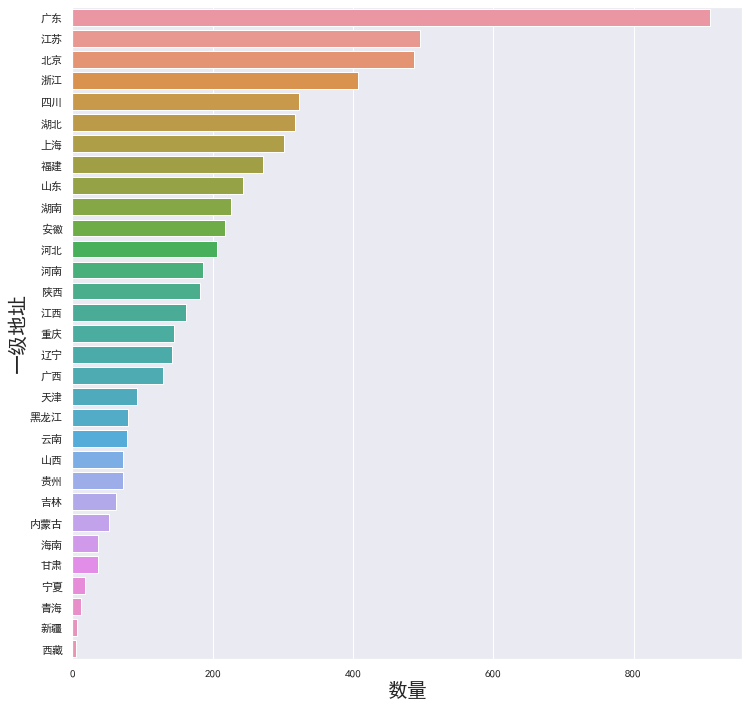

Text(50, 10, 'hello')

In [57]:
cur_ax = draw_hbarplot(df_gd,'一级地址','投诉排行_一级地址.png','投诉排行_一级地址.xlsx')

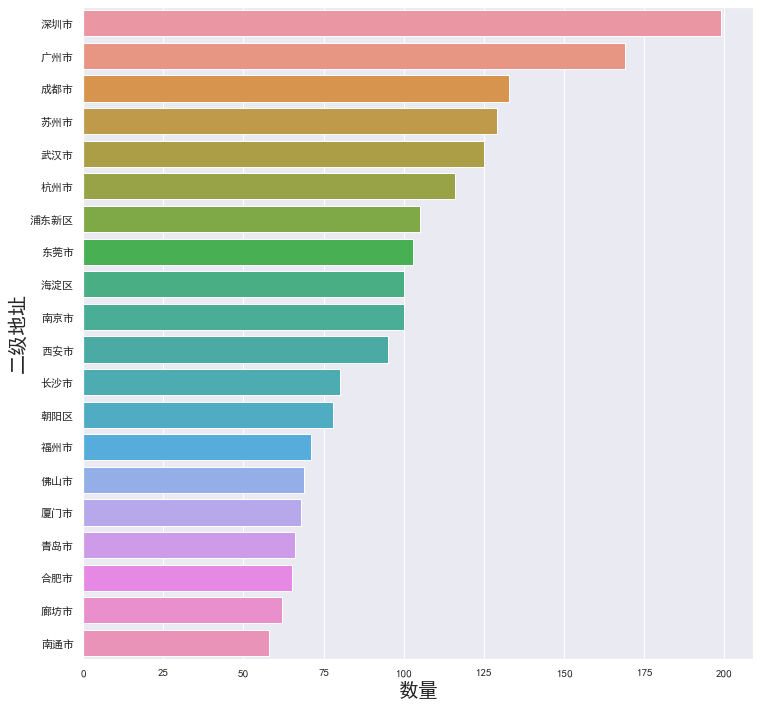

In [58]:
draw_hbarplot(df_gd,'二级地址','投诉排行_二级地址.png','投诉排行_二级地址.xlsx',top=True)

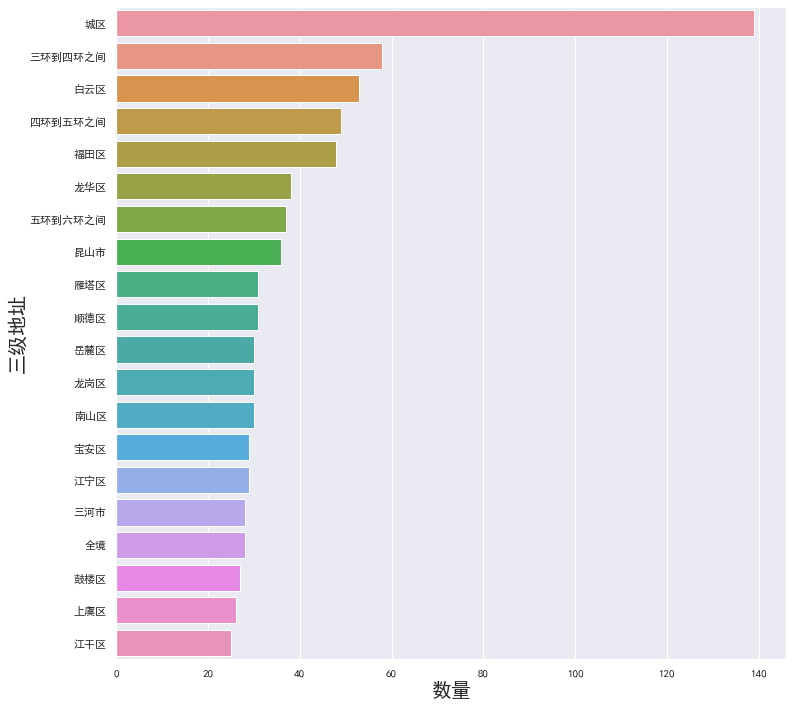

In [59]:
draw_hbarplot(df_gd,'三级地址','投诉排行_三级地址.png','投诉排行_三级地址.xlsx',top=True)

In [36]:
tousu = df_gd['首次发起内容'].values

In [40]:
tousu_ls = [str(i).split('-')[0] for i in tousu]

In [44]:
tousu_df = pd.DataFrame({'投诉详情':tousu_ls})
tousu_df.head()

,投诉详情
0,无人联系上门
1,维修后使用异常
2,上门不及时
3,未按标准收费
4,未按标准收费


In [47]:
tousu_df['投诉详情'].value_counts()

无人联系上门                                        1265
上门不及时                                          728
多次改约                                           608
未服务操作完成                                        557
服务不专业                                          537
                                              ... 
师傅一直未上门安装，麻烦师傅尽快上门安装，客户现在情绪很激动                   1
用户再次来电催促 请尽快联系上门安装  用户很生气 请加急处理                  1
客户来电催师傅下午上门/加急联系                                 1
尽快上门安装                                           1
客户来电催促，麻烦尽快安排师傅上门拆机，客户要求今天上门，不想等，麻烦尽快安排，谢谢       1
Name: 投诉详情, Length: 1130, dtype: int64

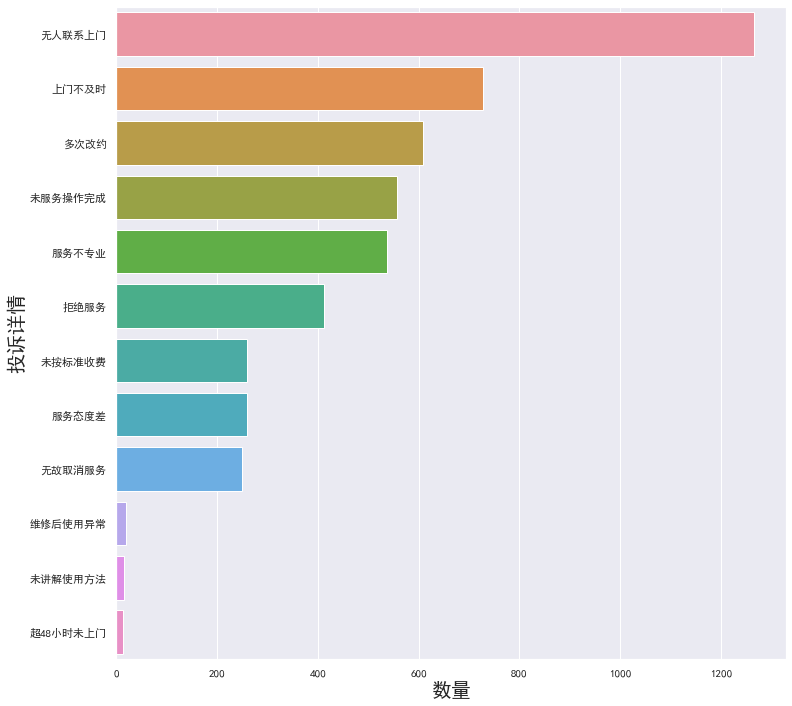

Text(200, 2, 'Hello')

In [63]:
cur_ax = draw_hbarplot(tousu_df,'投诉详情','投诉详情排行榜Top12.png','投诉详情排行榜.xlsx',top=True,topn=12)
cur_ax.text(200,2,'Hello',fontsize=20,ha="left", va="top", transform=ax.transAxes)

In [102]:
def draw_hbarplot_sec(df_gd,cur_col,outfile,top=False,topn=20,pad=10):
    plt.rcParams['font.sans-serif']=['SimHei'] 
    vc = df_gd[cur_col].value_counts()
    cur_df = pd.DataFrame({cur_col:vc.index.values,'数量':vc.values})
    #cur_df.to_excel(outexcel)
    if top:
        cur_df2 = cur_df.head(n=topn)
    else:
        cur_df2 = cur_df
    fig,ax = plt.subplots(figsize=[12,12])
    y_pos = list(range(cur_df2.shape[0]))
    ax.barh(y_pos, list(cur_df2.iloc[:,1].values)[::-1], align='center')
    ax.set_ylabel(cur_col,fontsize=20)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(list(cur_df2.iloc[:,0].values)[::-1],fontsize=15)
    ax.set_xlabel('数量',fontsize=20)
    
    for i in y_pos:
        x_value = list(cur_df2.iloc[:,1].values)[::-1][i]
        x_pos = x_value + pad
        ax.text(x_pos,i,str(x_value),fontsize=15,verticalalignment='center')
    plt.savefig(outfile,dpi=300,bbox_inches='tight')
    plt.show()

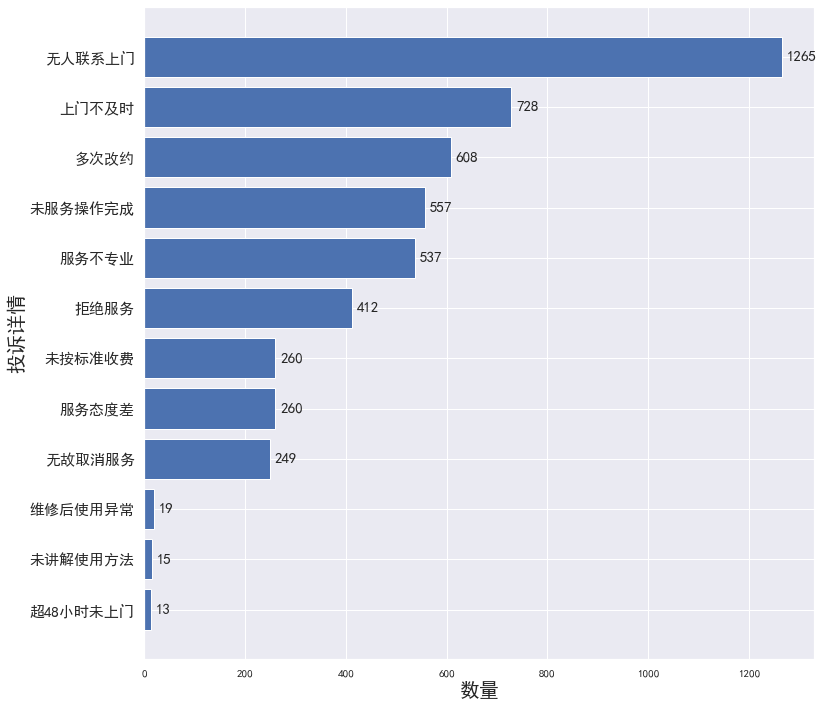

In [103]:
draw_hbarplot_sec(tousu_df,'投诉详情','v2.投诉详情排行榜Top12.png',top=True,topn=12)

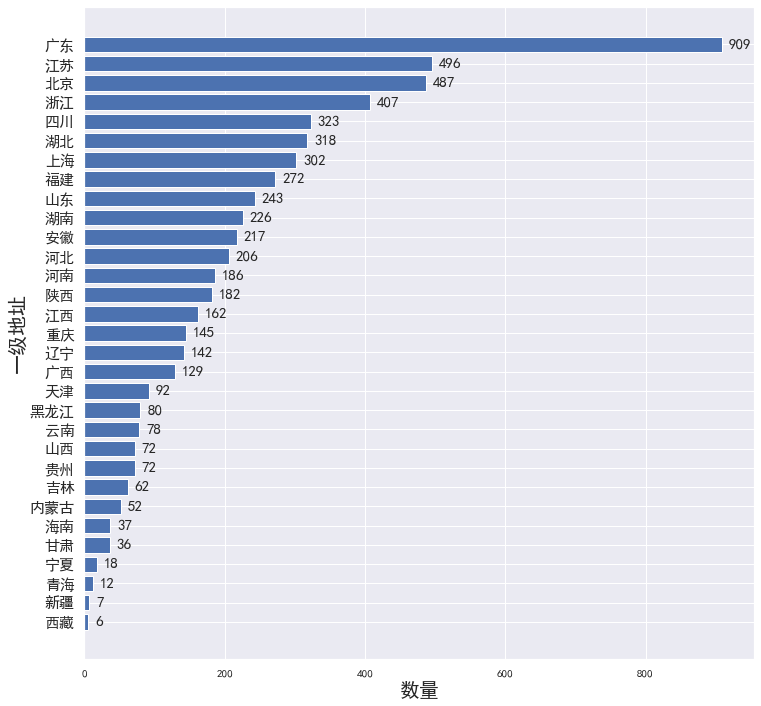

In [104]:
draw_hbarplot_sec(df_gd,'一级地址','v2.投诉排行_一级地址.png')

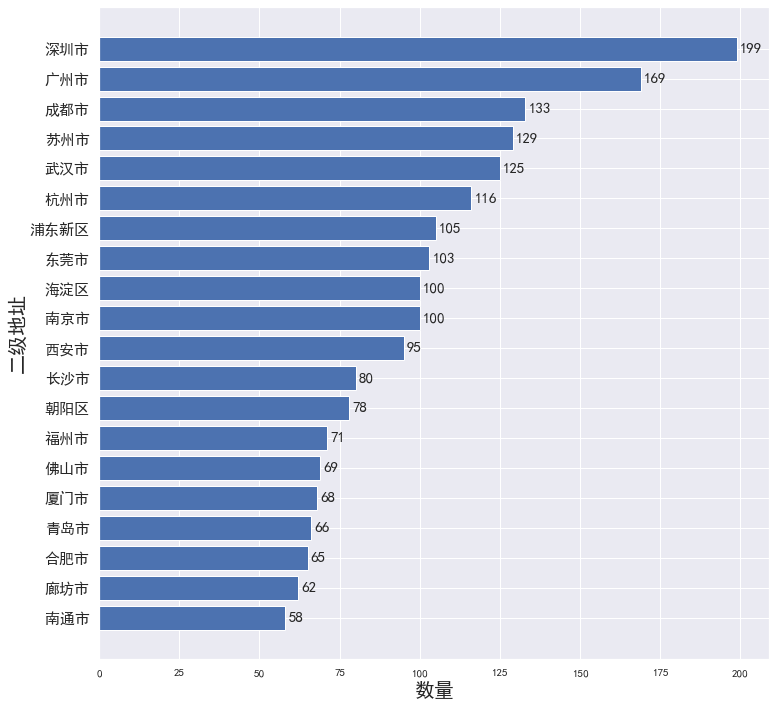

In [105]:
draw_hbarplot_sec(df_gd,'二级地址','v2.投诉排行_二级地址.png',top=True,pad=1)

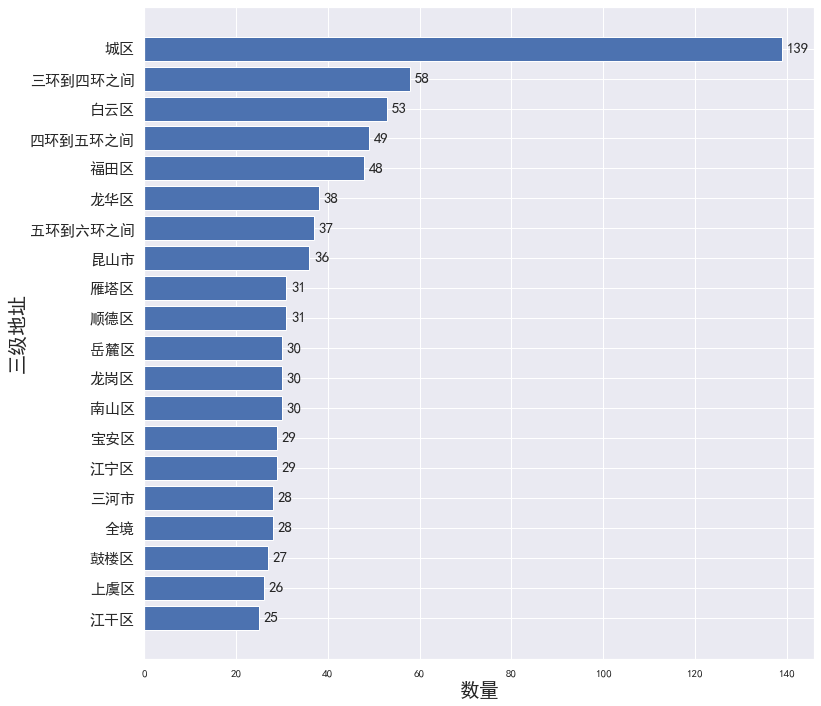

In [106]:
draw_hbarplot_sec(df_gd,'三级地址','v2.投诉排行_三级地址.png',top=True,pad=1)

In [11]:
from matplotlib.pyplot import figure

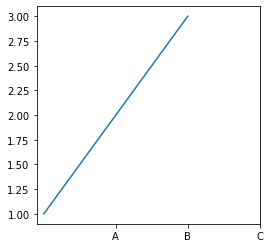

In [19]:
fig , ax = plt.subplots()

ax.plot([1,2,3])

fig = fig.set_size_inches(4,4)

ax.set_xticks([1,2,3])
ax.set_xticklabels(['A','B','C'])
plt.show()

In [20]:
import pandas as pd

In [21]:
df = pd.DataFrame({'A':[1,2,3],'B':[4,2,5]})
df

,A,B
0,1,4
1,2,2
2,3,5


In [26]:
df.shape[0]

3

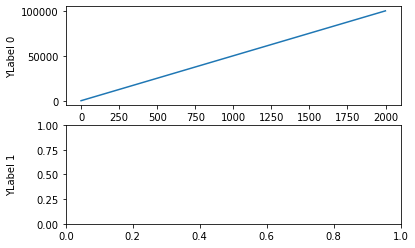

In [7]:
fig, axs = plt.subplots(2, 1)
axs[0].plot(np.arange(0, 100000, 50))
axs[0].set_ylabel('YLabel 0')
axs[1].set_ylabel('YLabel 1')

fig.align_ylabels()
plt.show()

## Altair test

In [76]:
import altair as alt
from vega_datasets import data
import pandas as pd
import numpy as np

In [30]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

e:\software\Python37\python.exe
3.7.4 (tags/v3.7.4:e09359112e, Jul  8 2019, 19:29:22) [MSC v.1916 32 bit (Intel)]
sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)


In [32]:
source = data.cars()
source.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


### mark_tick()

In [33]:
alt.Chart(source).mark_tick().encode(
    x='Horsepower:Q',
    y='Cylinders:O'
)

alt.Chart(...)

### mark_rect()

In [35]:
x, y = np.meshgrid(range(-5, 5), range(-5, 5))
z = x ** 2 + y ** 2

In [37]:
x

array([[-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4]])

In [36]:
x.ravel()

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4, -5, -4, -3, -2, -1,  0,  1,
        2,  3,  4, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4, -5, -4, -3, -2,
       -1,  0,  1,  2,  3,  4, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4, -5,
       -4, -3, -2, -1,  0,  1,  2,  3,  4, -5, -4, -3, -2, -1,  0,  1,  2,
        3,  4, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4, -5, -4, -3, -2, -1,
        0,  1,  2,  3,  4, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4])

In [38]:
source = pd.DataFrame({'x': x.ravel(),
                     'y': y.ravel(),
                     'z': z.ravel()})

alt.Chart(source).mark_rect().encode(
    x='x:O',
    y='y:O',
    color='z:Q'
)

alt.Chart(...)

In [102]:
df_gene_expr = pd.DataFrame({'Gene_count':[1,2,3,4,5,6],
                             'Description':['G1','G2','G3','G4','G5','G6'],
                            '-log(qvalue)':[15,100,12,80,20,50],
                            'GeneRatio':[0.01,0.5,0.08,0.1,0.25,0.2],
                            'Category':['GO BP','GO CC','GO MF','GO BP','GO CC','GO MF']})
df_gene_expr

,Gene_count,Description,-log(qvalue),GeneRatio,Category
0,1,G1,15,0.01,GO BP
1,2,G2,100,0.50,GO CC
2,3,G3,12,0.08,GO MF
3,4,G4,80,0.10,GO BP
4,5,G5,20,0.25,GO CC
5,6,G6,50,0.20,GO MF


In [95]:
df_gene_expr_bp = df_gene_expr.query('Category=="GO BP"')
df_gene_expr_bp

,Gene_count,Description,qvalue,GeneRatio,Category
0,1,G1,15,0.01,GO BP
3,4,G4,80,0.10,GO BP


In [96]:
df_gene_expr_cc = df_gene_expr.query('Category=="GO CC"')
df_gene_expr_cc

,Gene_count,Description,qvalue,GeneRatio,Category
1,2,G2,100,0.50,GO CC
4,5,G5,20,0.25,GO CC


In [97]:
df_gene_expr_mf = df_gene_expr.query('Category=="GO MF"')
df_gene_expr_mf

,Gene_count,Description,qvalue,GeneRatio,Category
2,3,G3,12,0.08,GO MF
5,6,G6,50,0.20,GO MF


In [103]:
alt.Chart(df_gene_expr).mark_point().encode(
    x='Gene_count:Q',
    y='Description:O',
    color=alt.Color('-log(qvalue):Q', scale=alt.Scale(range=['green','yellow','red'])),
    size='GeneRatio:Q',
    shape='Category'
).properties(width=400, height=400)

alt.Chart(...)

### GO分析气泡图altair实现

In [104]:
go_data_df = pd.read_excel('GO_fruit_filter2.xlsx')
go_data_df.head()

,GO,NS,enrichment,name,ratio_in_study,ratio_in_pop,p_uncorrected,depth,study_count,p_fdr_bh,study_items
0,GO:0006414,BP,e,translational elongation,4/132,31/27006,1.548757e-05,6,4,2.796680e-03,"Capana01g003452, Capana06g002575, Capana11g000..."
1,GO:0034250,BP,e,positive regulation of cellular amide metaboli...,3/132,12/27006,2.431426e-05,6,3,4.139676e-03,"Capana04g001753, Capana04g001754, Capana05g000103"
2,GO:0045727,BP,e,positive regulation of translation,3/132,12/27006,2.431426e-05,8,3,4.139676e-03,"Capana04g001753, Capana04g001754, Capana05g000103"
3,GO:0009536,CC,e,plastid,16/132,478/27006,1.735849e-09,5,16,6.084660e-07,"Capana00g001461, Capana00g001712, Capana01g000..."
4,GO:0009507,CC,e,chloroplast,15/132,419/27006,2.339385e-09,6,15,7.744665e-07,"Capana00g001712, Capana01g000505, Capana01g001..."


In [120]:
core_go_data_df = go_data_df.iloc[:,[1,3,4,8,9]].copy()

,NS,name,ratio_in_study,study_count,p_fdr_bh
0,BP,translational elongation,4/132,4,2.796680e-03
1,BP,positive regulation of cellular amide metaboli...,3/132,3,4.139676e-03
2,BP,positive regulation of translation,3/132,3,4.139676e-03
3,CC,plastid,16/132,16,6.084660e-07
4,CC,chloroplast,15/132,15,7.744665e-07


In [121]:
real_count = np.array([int(i.split('/')[0]) for i in core_go_data_df['ratio_in_study'].values])
diff_count = np.array([int(i.split('/')[1]) for i in core_go_data_df['ratio_in_study'].values])
GeneRatio = real_count / diff_count

In [122]:
core_go_data_df['GeneRatio'] = GeneRatio
core_go_data_df.head()

,NS,name,ratio_in_study,study_count,p_fdr_bh,GeneRatio
0,BP,translational elongation,4/132,4,2.796680e-03,0.030303
1,BP,positive regulation of cellular amide metaboli...,3/132,3,4.139676e-03,0.022727
2,BP,positive regulation of translation,3/132,3,4.139676e-03,0.022727
3,CC,plastid,16/132,16,6.084660e-07,0.121212
4,CC,chloroplast,15/132,15,7.744665e-07,0.113636


In [126]:
core_go_data_df['-log(qvalue)'] = -np.log10(core_go_data_df['-log(qvalue)'].values)

In [127]:
core_go_data_df.columns = ['Category','Description','ratio_in_study','Gene_count','-log(qvalue)','GeneRatio']
core_go_data_df.head()

,Category,Description,ratio_in_study,Gene_count,-log(qvalue),GeneRatio
0,BP,translational elongation,4/132,4,2.553357,0.030303
1,BP,positive regulation of cellular amide metaboli...,3/132,3,2.383034,0.022727
2,BP,positive regulation of translation,3/132,3,2.383034,0.022727
3,CC,plastid,16/132,16,6.215764,0.121212
4,CC,chloroplast,15/132,15,6.110997,0.113636


In [235]:
go_point_chart = alt.Chart(core_go_data_df).mark_point(color='white').encode(
    x='Gene_count:Q',
    y='Description:N',
    size='GeneRatio:Q',
    shape='Category',
    fill=alt.Color('-log(qvalue):Q', scale=alt.Scale(range=['green','yellow','red'])),
).properties(width=400, height=400)
go_point_chart.configure_axisX(labelFontSize=12,titleFontSize=20)\
.configure_axisY(labelFontSize=12,titleFontSize=20,labelLimit=-1,titlePadding=210)\
.configure_legend(
    labelFontSize=12,
    titleFontSize=12,
    rowPadding=5
)
#fillColor='#EEEEEE',
#padding=2,

alt.Chart(...)

---

### Including Index Data

In [43]:
rand = np.random.RandomState(0)

time_data = pd.DataFrame({'value': rand.randn(100).cumsum()},
                    index=pd.date_range('2018', freq='D', periods=100))
time_data.head()

,value
2018-01-01,1.764052
2018-01-02,2.164210
2018-01-03,3.142948
2018-01-04,5.383841
2018-01-05,7.251399


In [45]:
time_data.reset_index().head()

,index,value
0,2018-01-01,1.764052
1,2018-01-02,2.164210
2,2018-01-03,3.142948
3,2018-01-04,5.383841
4,2018-01-05,7.251399


In [46]:
alt.Chart(time_data.reset_index()).mark_line().encode(
    x='index:T',
    y='value:Q'
)

alt.Chart(...)

### Graticule Generator

In [52]:
data = alt.graticule(step=[15, 15])

alt.Chart(data).mark_geoshape(stroke='black').project(
    'orthographic',
    rotate=[0, 0, 0]
)

alt.Chart(...)

In [87]:
df=pd.DataFrame({'days_between': [1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6],
                 'person': [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,2],
                 'value': [10,11,12,13,14,15,10,11,12,13,14,15]})
df['days_between'] = df['days_between'].map({i + 1: 'ABCDEF'[i] for i in range(6)})

circle_alt = alt.Chart(df).mark_circle(size=400).encode(
    x=alt.X('days_between:O'),
    y=alt.Y('person:Q', axis=alt.Axis(values=[1,2])),
    color=alt.Color('value:Q', scale=alt.Scale(range=['green','yellow','red']))
).properties(width=400, height=400)

circle_alt.mark_square(size=400).encode(
    x=alt.X('days_between:O'),
    y=alt.Y('person:Q', axis=alt.Axis(values=[1,2])),
    color=alt.Color('value:Q', scale=alt.Scale(range=['green','yellow','red']))
).properties(width=400, height=400)

alt.Chart(...)